<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [17]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import Data: Census Track Shape file.

    http://www1.nyc.gov/
    Name : nycb2010_16d

In [2]:
from geopandas import GeoDataFrame
import shapefile 
import pandas as pd
from fiona.crs import from_epsg
import fiona
import shapely
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ct_shape = GeoDataFrame.from_file("nycb2010_16d/nycb2010.shp")
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


## Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

### Convert the coordinates
    From epsg=2263 to epsg=4326

In [4]:
ct_shape = ct_shape.to_crs(epsg=4326)  
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((-74.07061992438021 40.6108550670875,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456046...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658921...


### Extract only the Brooklyn shape polygons

In [5]:
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"] 
ct_latlon.head(10)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273368512...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300313,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...
5042,30020001000,3,Brooklyn,1000,002000,203150.927230,2076.660170,POLYGON ((-74.01298705619368 40.64945600088912...
5043,30022001000,3,Brooklyn,1000,002200,202989.817092,2080.720191,POLYGON ((-74.01925526318797 40.64685276173369...
5044,30030001000,3,Brooklyn,1000,003000,2288.488412,251.742624,POLYGON ((-74.02626267406126 40.64009438137107...
5045,30031001000,3,Brooklyn,1000,003100,214447.259568,1902.577167,POLYGON ((-73.97782679465359 40.69343813943176...
5046,30033001000,3,Brooklyn,1000,003300,258228.648239,2448.507197,POLYGON ((-73.97510566428163 40.68969750920952...


In [6]:
ct_latlon.tail()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
38780,30159001004,3,Brooklyn,1004,015900,1.898360e+05,2019.867710,POLYGON ((-73.97009060164002 40.67479961562587...
38785,30255001000,3,Brooklyn,1000,025500,7.457156e+05,3463.884145,POLYGON ((-73.94994334334457 40.69904728249294...
38786,30531001001,3,Brooklyn,1001,053100,2.420815e+05,2368.885044,POLYGON ((-73.95013638357567 40.69991541475112...
38791,30177001015,3,Brooklyn,1015,017700,5.876303e+05,6679.656578,POLYGON ((-73.96188086439825 40.65488119158298...
38792,30177001020,3,Brooklyn,1020,017700,2.493996e+06,20334.551359,POLYGON ((-73.96372233169369 40.65985519209716...


## Find the coordinates of CUSP: 1 MetroTech Brooklyn. 
    Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

### Coordinates of CUSP: lat = 40.6931, lon = 73.9866

In [7]:
cusplatlon = [{"Location": " 1 MetroTech Brooklyn", "lon": -73.9866 , "lat": 40.6931}]
cusp = GeoDataFrame(data=cusplatlon)
cusp

,Location,lat,lon
0,1 MetroTech Brooklyn,40.6931,-73.9866


In [8]:
point = shapely.geometry.Point(cusp.lon, cusp.lat)
print point
from shapely.geometry import shape

POINT (-73.9866 40.6931)


### Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [9]:
cuspploy = []
for i, ct in enumerate(ct_latlon.geometry):
    # to loop over brooklyn polygons
     if shape(ct).contains(point):
            # to see if the polygons contains the cusp point
            print i
            cuspploy.append(ct)
            print('CUSP is contained in %s'%(str(ct)))


2554
CUSP is contained in POLYGON ((-73.98622595691906 40.6930883134384, -73.98627231669103 40.6921947946671, -73.98729894947923 40.69223407543158, -73.98725396415627 40.69312490276505, -73.98622595691906 40.6930883134384))


In [10]:
ct_latlon.reset_index(inplace = True)

In [11]:
cusppoly = GeoDataFrame(ct_latlon.iloc[2554, :]).T

In [12]:
cusppoly

,index,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
2554,7591,30011001008,3,Brooklyn,1008,001100,92776.3,1221.03,"POLYGON ((-73.98622595691906 40.6930883134384,..."


## Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the location of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [13]:
idx = []
for i in range(0, 9682, 10):
    idx.append(i)

In [14]:
# for every 10 polygons of brooklyn
ct_latlon10 = ct_latlon.iloc[idx,:]
len(ct_latlon10)

969

In [15]:
ct_latlon10.head()

,index,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273368512...
10,5047,30035001000,3,Brooklyn,1000,003500,10469.636350,507.804498,POLYGON ((-73.97551988364874 40.68675683612324...
20,5057,30054001000,3,Brooklyn,1000,005400,189033.189700,1938.321547,POLYGON ((-74.03649125984289 40.61798915520121...
30,5067,30067001000,3,Brooklyn,1000,006700,198454.446949,1936.158155,POLYGON ((-73.99440802432692 40.68545249602956...
40,5077,30084001000,3,Brooklyn,1000,008400,208451.540053,2121.627337,POLYGON ((-74.00041318188852 40.65462870194953...


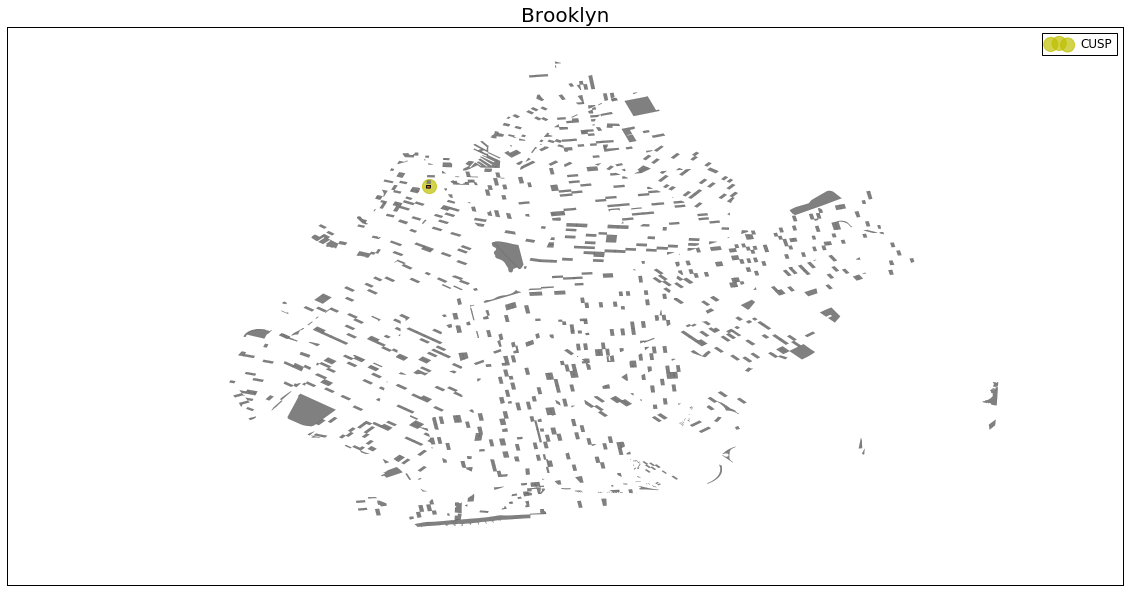

In [16]:
f, ax = plt.subplots(figsize = (20,10))
plt.title("Brooklyn", fontsize = 20)
ct_latlon10.plot(column='BCTCB2010', alpha=1, linewidth=0.1, ax=ax, color = "grey")

ax.scatter(-73.9866, 40.6931, s=200, color = "y", alpha=0.7, label="CUSP")   
cusppoly.plot(color = "r", ax = ax )
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.legend()

    Above is the graph that ploted every 10 polygons in Brooklyn, the yellow dot represents the location where CUSP(NYU Center of Urban Science and Progress) is homed. The red area under the yellow dot is the census track polygon that contains CUSP. 